In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
df = pd.read_csv("adult.csv")

print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income-bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                 age workclass        fnlwgt education  education-num  \
count   32561.0

**Problem 1 part a**



In [2]:
print(df[['age', 'hours-per-week']].describe())

                age  hours-per-week
count  32561.000000    32561.000000
mean      38.581647       40.437456
std       13.640433       12.347429
min       17.000000        1.000000
25%       28.000000       40.000000
50%       37.000000       40.000000
75%       48.000000       45.000000
max       90.000000       99.000000


**Problem 1 part b**

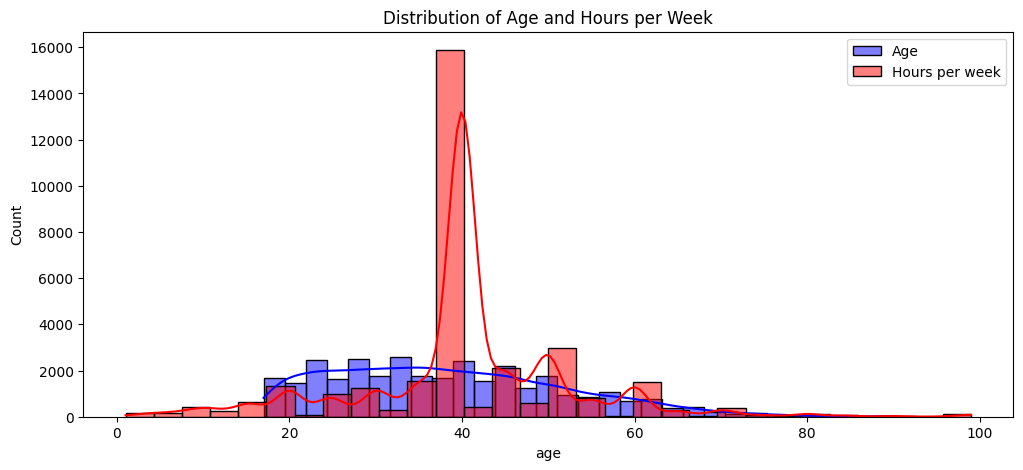

In [4]:
plt.figure(figsize=(12, 5))

# Histogram
sns.histplot(df['age'], bins=30, kde=True, color="blue", label="Age", alpha=0.5)
sns.histplot(df['hours-per-week'], bins=30, kde=True, color="red", label="Hours per week", alpha=0.5)
plt.legend()
plt.title("Distribution of Age and Hours per Week")
plt.show()

**Problem 1 part c**

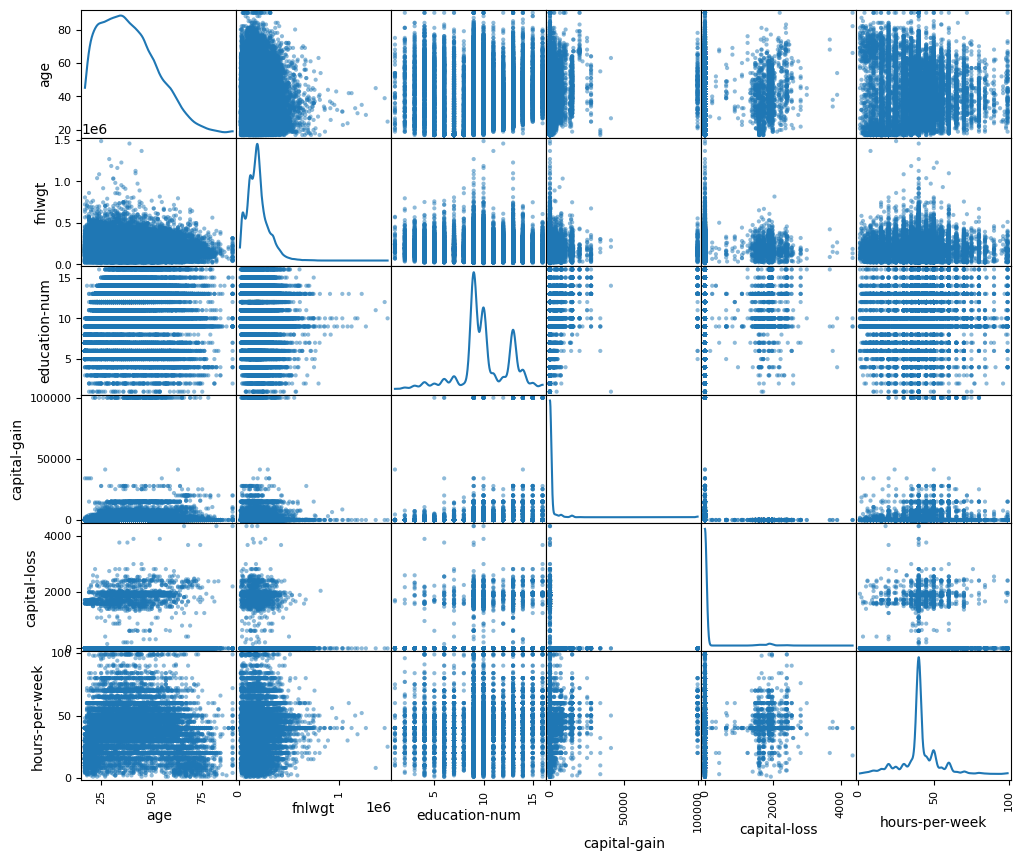

In [5]:
from pandas.plotting import scatter_matrix

numerical_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Scatterplot
scatter_matrix(df[numerical_vars], figsize=(12, 10), diagonal="kde")
plt.show()


**Problem 1 part d**

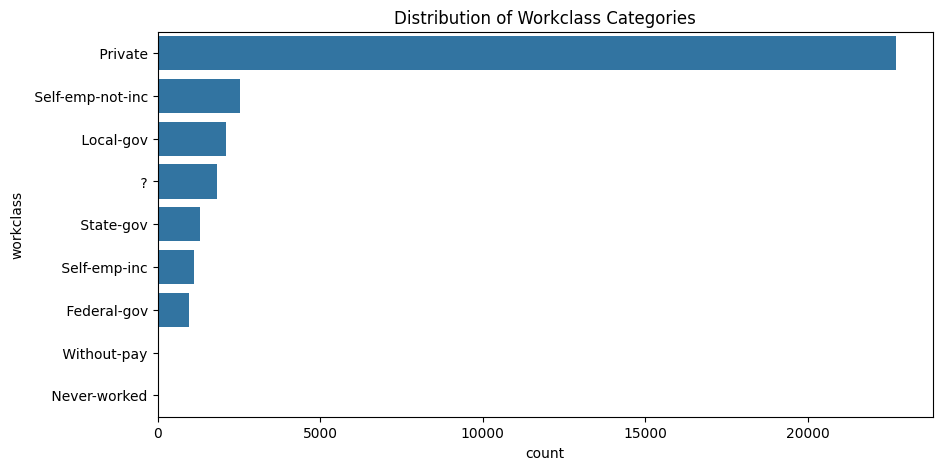

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['workclass'], order=df['workclass'].value_counts().index)
plt.title("Distribution of Workclass Categories")
plt.show()

print(df['workclass'].value_counts(normalize=True))

**Problem 1 part e**

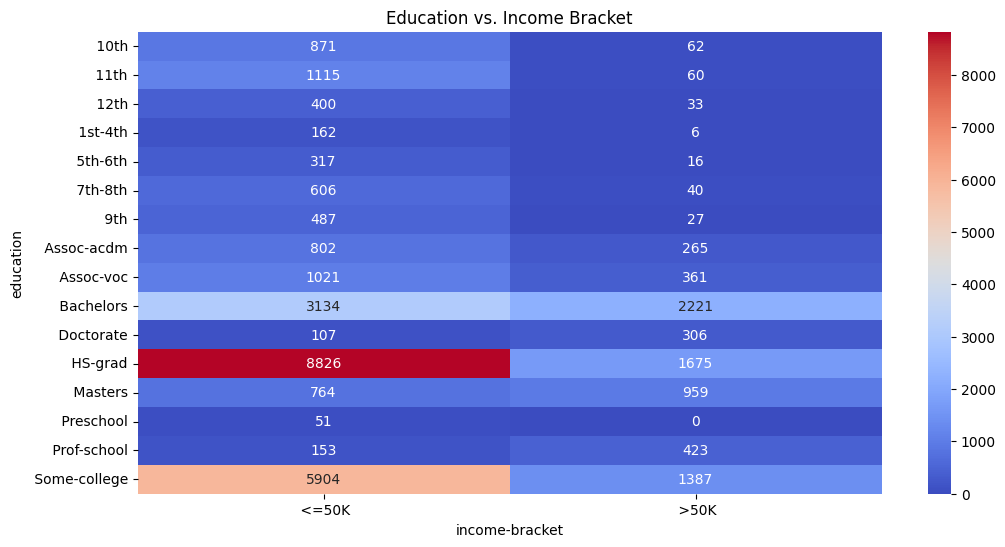

In [7]:
edu_income = pd.crosstab(df['education'], df['income-bracket'])

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(edu_income, annot=True, fmt="d", cmap="coolwarm")
plt.title("Education vs. Income Bracket")
plt.show()

**Problem 2 a**

In [11]:
import pandas as pd

df_even = pd.read_csv("population_even.csv", delimiter="\t", header=None)
df_even = df_even[0].str.split(',', expand=True)

df_even.columns = df_even.iloc[0]
df_even = df_even[1:]

df_odd = pd.read_csv("population_odd.csv", delimiter="\t", header=None)
df_odd = df_odd[0].str.split(',', expand=True)
df_odd.columns = df_odd.iloc[0]
df_odd = df_odd[1:]

df = pd.merge(df_even, df_odd, on=["STATE", "NAME"])

print(df.head())

0 STATE        NAME POPESTIMATE2010 POPESTIMATE2012 POPESTIMATE2014  \
0     1     Alabama         4785437         4815588         4841799   
1     2      Alaska          713910          730443          736283   
2     4     Arizona         6407172         6554978         6730413   
3     5    Arkansas         2921964         2952164         2967392   
4     6  California        37319502        37948800        38596972   

0 POPESTIMATE2016 POPESTIMATE2018 POPESTIMATE2011 POPESTIMATE2013  \
0         4863525         4887681         4799069         4830081   
1          741456          735139          722128          737068   
2         6941072         7158024                         6632764   
3         2989918         3009733         2940667         2959400   
4        39167117        39461588        37638369        38260787   

0 POPESTIMATE2015 POPESTIMATE2017 POPESTIMATE2019  
0         4852347         4874486         4903185  
1          737498          739700          731545  
2 

**Problem 2b**

In [12]:
if "STATE_x" in df.columns and "STATE_y" in df.columns:
    df = df.drop(columns=["STATE_y"]).rename(columns={"STATE_x": "STATE"})

In [13]:
df.columns = df.columns.str.replace("POPESTIMATE", "")

In [14]:
columns_order = ["STATE", "NAME"] + sorted([col for col in df.columns if col.isdigit()])
df = df[columns_order]

print(df.head())

0 STATE        NAME      2010      2011      2012      2013      2014  \
0     1     Alabama   4785437   4799069   4815588   4830081   4841799   
1     2      Alaska    713910    722128    730443    737068    736283   
2     4     Arizona   6407172             6554978   6632764   6730413   
3     5    Arkansas   2921964   2940667   2952164   2959400   2967392   
4     6  California  37319502  37638369  37948800  38260787  38596972   

0      2015      2016      2017      2018      2019  
0   4852347   4863525   4874486   4887681   4903185  
1    737498    741456    739700    735139    731545  
2   6829676   6941072   7044008   7158024   7278717  
3   2978048   2989918   3001345   3009733   3017804  
4  38918045  39167117  39358497  39461588  39512223  


**Problem 2c**

In [18]:
for year in range(2011, 2019, 2):
    prev_year, next_year = str(year - 1), str(year + 1)
    df[prev_year] = pd.to_numeric(df[prev_year], errors='coerce')
    df[next_year] = pd.to_numeric(df[next_year], errors='coerce')
    df[str(year)] = pd.to_numeric(df[str(year)], errors='coerce')
    df[str(year)] = df[str(year)].fillna((df[prev_year] + df[next_year]) / 2)

print(df.head())

0 STATE        NAME      2010        2011      2012        2013      2014  \
0     1     Alabama   4785437   4799069.0   4815588   4830081.0   4841799   
1     2      Alaska    713910    722128.0    730443    737068.0    736283   
2     4     Arizona   6407172   6481075.0   6554978   6632764.0   6730413   
3     5    Arkansas   2921964   2940667.0   2952164   2959400.0   2967392   
4     6  California  37319502  37638369.0  37948800  38260787.0  38596972   

0        2015      2016        2017      2018      2019  
0   4852347.0   4863525   4874486.0   4887681   4903185  
1    737498.0    741456    739700.0    735139    731545  
2   6829676.0   6941072   7044008.0   7158024   7278717  
3   2978048.0   2989918   3001345.0   3009733   3017804  
4  38918045.0  39167117  39358497.0  39461588  39512223  


**Problem 2d**

In [21]:
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df["Max_Population"] = df.iloc[:, 2:].max(axis=1)
print(df[["STATE", "NAME", "Max_Population"]].head())

0 STATE        NAME  Max_Population
0     1     Alabama       4903185.0
1     2      Alaska        741456.0
2     4     Arizona       7278717.0
3     5    Arkansas       3017804.0
4     6  California      39512223.0


In [22]:
df["Total_Population"] = df.iloc[:, 2:].sum(axis=1)
print(df[["STATE", "NAME", "Total_Population"]].head())

0 STATE        NAME  Total_Population
0     1     Alabama        53356383.0
1     2      Alaska         8066626.0
2     4     Arizona        75336616.0
3     5    Arkansas        32756239.0
4     6  California       425694123.0


**Problem 2e**

In [23]:
total_population_2019 = df["2019"].sum()
print(f"Total US Population in 2019: {total_population_2019}")

Total US Population in 2019: 325610783.0


**Problem 3**

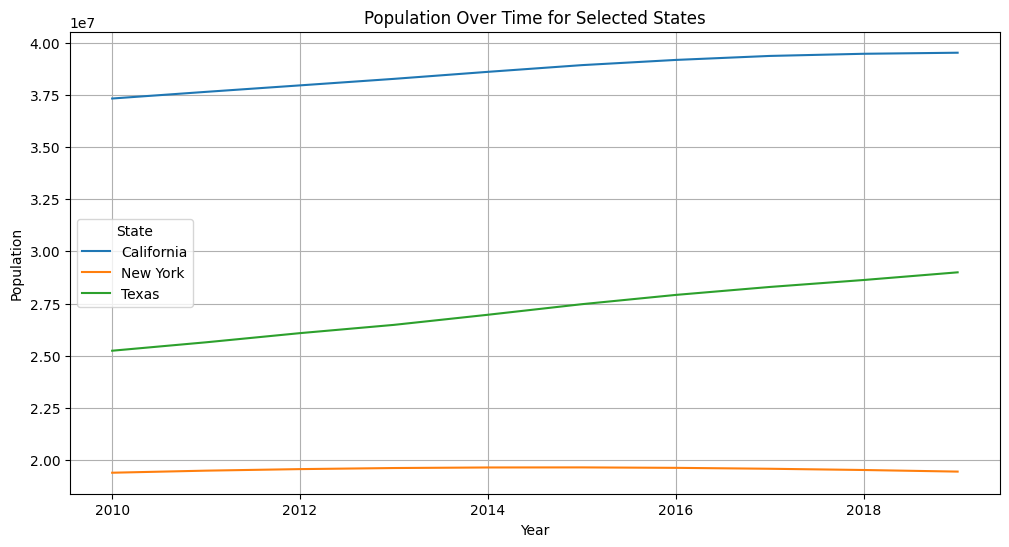

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


selected_states = ["California", "Texas", "New York"]

df_selected = df[df["NAME"].isin(selected_states)]

df_melted = df_selected.melt(id_vars=["STATE", "NAME"],
                             value_vars=[str(year) for year in range(2010, 2020)],
                             var_name="Year",
                             value_name="Population")

df_melted["Year"] = df_melted["Year"].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Population", hue="NAME", data=df_melted)
plt.title("Population Over Time for Selected States")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.legend(title="State")
plt.show()
